# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import json
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create the Base URL for the API Call
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Create lists to store the data as we're looping through the API calls
city_names = []
cloudiness = []
countries = []
dates = []
humidity = []
lat = []
lng = []
max_temps = []
wind_speeds = []
count = 0
set_count = 1

# Begin Data Retrieval via For Loop where we make a call for each city
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        if count >= 50:
            set_count = set_count + 1
            count = 0
        count = count + 1
        response = requests.get(f'{base_url}{city}&appid={weather_api_key}').json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f'Processing Record {count} of Set {set_count} | {city}')
        city_names.append(city)
    except:
        print('City not found. Skipping...')
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | boa vista
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | sharkan
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | brigantine
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | chilliwack
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | yuncheng
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | dzaoudzi
Processing Record 24 of Set 1 | 

Processing Record 6 of Set 5 | portree
Processing Record 7 of Set 5 | ossora
Processing Record 8 of Set 5 | murray bridge
Processing Record 9 of Set 5 | nsukka
Processing Record 10 of Set 5 | esperance
Processing Record 11 of Set 5 | jahazpur
Processing Record 12 of Set 5 | constitucion
Processing Record 13 of Set 5 | iracoubo
Processing Record 14 of Set 5 | port lincoln
Processing Record 15 of Set 5 | san patricio
City not found. Skipping...
Processing Record 17 of Set 5 | kanashevo
Processing Record 18 of Set 5 | sawakin
City not found. Skipping...
Processing Record 20 of Set 5 | olinda
Processing Record 21 of Set 5 | labuhan
Processing Record 22 of Set 5 | klaksvik
Processing Record 23 of Set 5 | bengkulu
Processing Record 24 of Set 5 | kologriv
Processing Record 25 of Set 5 | jumla
City not found. Skipping...
Processing Record 27 of Set 5 | heemskerk
City not found. Skipping...
Processing Record 29 of Set 5 | port hawkesbury
Processing Record 30 of Set 5 | san quintin
Processing Re

Processing Record 9 of Set 9 | rocha
Processing Record 10 of Set 9 | yermakovskoye
Processing Record 11 of Set 9 | kapuskasing
Processing Record 12 of Set 9 | karasuk
Processing Record 13 of Set 9 | fort nelson
Processing Record 14 of Set 9 | zorritos
Processing Record 15 of Set 9 | tukuyu
Processing Record 16 of Set 9 | erzin
Processing Record 17 of Set 9 | saint anthony
Processing Record 18 of Set 9 | solhan
City not found. Skipping...
Processing Record 20 of Set 9 | jilib
Processing Record 21 of Set 9 | buriti bravo
City not found. Skipping...
Processing Record 23 of Set 9 | quelimane
Processing Record 24 of Set 9 | indian head
Processing Record 25 of Set 9 | nanortalik
Processing Record 26 of Set 9 | kaitangata
Processing Record 27 of Set 9 | lompoc
Processing Record 28 of Set 9 | aripuana
Processing Record 29 of Set 9 | sorland
Processing Record 30 of Set 9 | yulara
Processing Record 31 of Set 9 | lambarene
Processing Record 32 of Set 9 | ahipara
Processing Record 33 of Set 9 | ab

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the Pandas Data Frame
weather_df = pd.DataFrame({
    "City": city_names,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
})

# Convert the Kelvin Temps to Farehneith
weather_df['Max Temp'] = weather_df['Max Temp'].apply(lambda x: (x-273.15)*9/5  + 32)

# Export data to CSV File
weather_df.to_csv(output_data_file, index=False, header=True)

In [5]:
# Display the Data Frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,7,PF,1593751588,69,-23.12,-134.97,71.096,8.84
1,cidreira,1,BR,1593751589,82,-30.18,-50.21,45.950,5.10
2,carnarvon,0,AU,1593751589,22,-24.87,113.63,86.000,6.70
3,boa vista,82,BR,1593751589,78,2.82,-60.67,80.600,1.00
4,castro,0,BR,1593751589,86,-24.79,-50.01,40.838,0.58


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
current_date = date.today()
current_date = current_date.strftime("%x")

#### Latitude vs. Temperature Plot

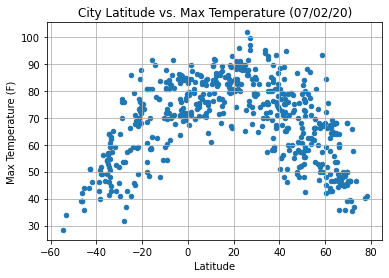

In [7]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True)
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/fig1.png")
plt.show()

<h6>Observation</h6>
<p>This graph shows us a genral trend of the highest max temperatures being around 0 latitude, also called the Prime Meridian. We can see that he further we get away from 0 latitude the lower the max temperature will be. There seems to be a correlation in two directions from the 0 point on the x axis.</p>

#### Latitude vs. Humidity Plot

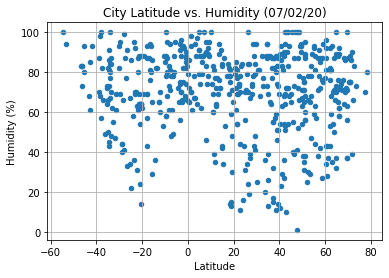

In [8]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True)
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/fig2.png")
plt.show()

<h6>Observation</h6>
<p>Humidity does not have the same type of distribution as temperature does related to latitude. You can find high and low humidity areas at all latitudes with very few exceptions. There seems to be little to no correlation.</p>

#### Latitude vs. Cloudiness Plot

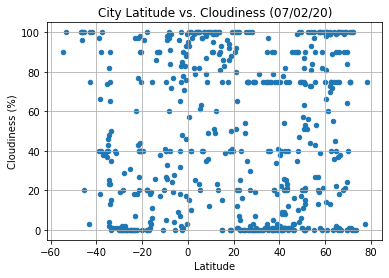

In [9]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True)
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/fig3.png")
plt.show()

<h6>Observation</h6>
<p>The distribution of cloudiness is very similar to humidity. It was very spread and shows an equal distribution across all almost all latitudes. There seems to be little to no correlation.</p>

#### Latitude vs. Wind Speed Plot

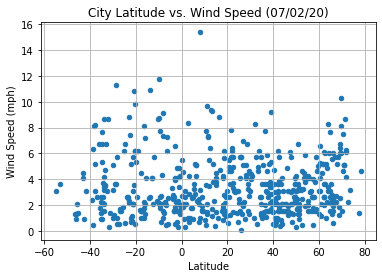

In [10]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True)
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/fig4.png")
plt.show()

<h6>Observation</h6>
<p>Once again, windspeed seems to be mostly consisten across all latitudes with little to no correlation. There are some strong outliers at the extreme negative and positive latitudes.</p>

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print(f'The r-squared is: {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    if rvalue < 0:
        plt.annotate(line_eq,((x_values.min()),(y_values.min())),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,((x_values.median()),(y_values.min())),fontsize=15,color="red")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = weather_df.loc[weather_df['Lat'] >= 0, :]
southern_hem_df = weather_df.loc[weather_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6807735195111259


Text(0, 0.5, 'Max Temp')

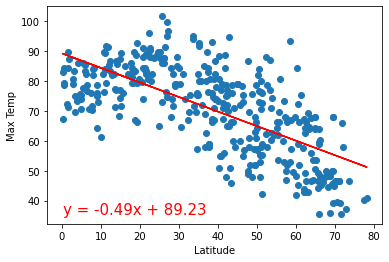

In [13]:
linear_reg(northern_hem_df["Lat"], northern_hem_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

<h6>Linear Regression Analysis</h6>
<p>This graph shows that the northern hemisphere has a very strong correlation between temp and latitude. This reinforces our observation from the first plot an zooms in on a single hemisphere to show a correlation in only one direction.</p>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7421167067753086


Text(0, 0.5, 'Max Temp')

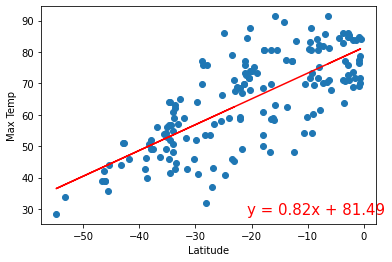

In [14]:
linear_reg(southern_hem_df["Lat"], southern_hem_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

<h6>Linear Regression Analysis</h6>
<p>This correlatoin still exists in the hemisphere but isn't nearly as strong. We see a wider spread of temperature distribution.</p>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.04944711865574048


Text(0, 0.5, 'Humidity')

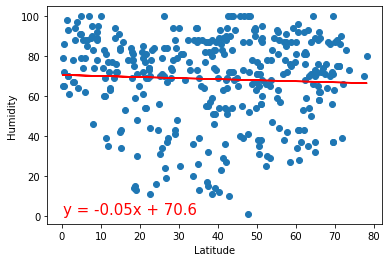

In [15]:
linear_reg(northern_hem_df["Lat"], northern_hem_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

<h6>Linear Regression Analysis</h6>
<p>Much like our original humidty plot we see a very week to no correlation between humidity and latitude.</p>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04945089825406374


Text(0, 0.5, 'Humidity')

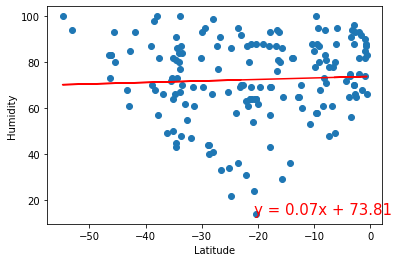

In [16]:
linear_reg(southern_hem_df["Lat"], southern_hem_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

<h6>Linear Regression Analysis</h6>
<p>Much like our original humidty plot we see a very week to no correlation between humidity and latitude.</p>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.09448216662025224


Text(0, 0.5, 'Cloudiness')

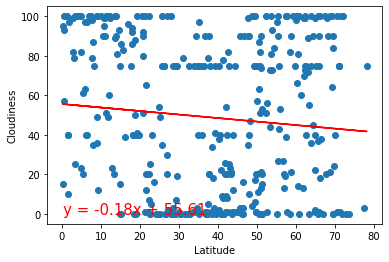

In [17]:
linear_reg(northern_hem_df["Lat"], northern_hem_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

<h6>Linear Regression Analysis</h6>
<p>Much like our original cloudiness plot we see a very week to no correlation between cloudiness and latitude.</p>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014915629257115957


Text(0, 0.5, 'Cloudiness')

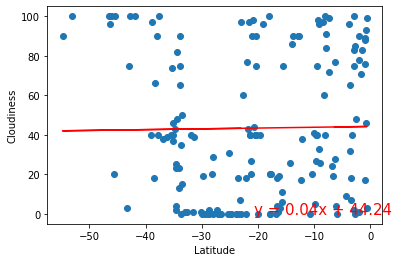

In [18]:
linear_reg(southern_hem_df["Lat"], southern_hem_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

<h6>Linear Regression Analysis</h6>
<p>By zooming in on the negative latitudes we see a slightly strong, although, still very weak to no correlation between cloudiness and latitude.</p>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.044415122267828684


Text(0, 0.5, 'Wind Speed')

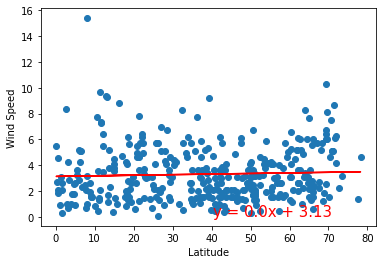

In [19]:
linear_reg(northern_hem_df["Lat"], northern_hem_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

<h6>Linear Regression Analysis</h6>
<p>The plot of wind speed has a very high density in the minimum values but still shows a very weak to no correlation between latitude and wind speed. It seems that most of the correlation is impacted by a few extreme outliers at the max latitudes.</p>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.013835743796438654


Text(0, 0.5, 'Wind Speed')

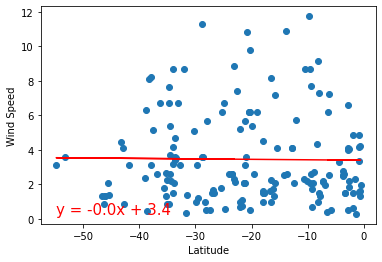

In [20]:
linear_reg(southern_hem_df["Lat"], southern_hem_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

<h6>Linear Regression Analysis</h6>
<p>This plot of wind speed also has a very high density in the minimum values and still shows a very weak to no correlation between latitude and wind speed. It seems that most of the correlation is impacted by a few extreme outliers at the min latitudes.</p>